In [61]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px
import json
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

dataset_name = "3.4.26"
tolerence_level = 1


In [62]:
df = pd.read_csv("Dataset/source addresses/"+ dataset_name +".csv")

In [63]:
df

,datetime,source_addr
0,2018-11-07 18:00:00,6
1,2018-11-07 19:00:00,14
2,2018-11-07 20:00:00,2
3,2018-11-07 21:00:00,2
4,2018-11-07 22:00:00,0
...,...,...
25004,2021-09-14 14:00:00,30
25005,2021-09-14 15:00:00,12
25006,2021-09-14 16:00:00,22
25007,2021-09-14 17:00:00,4


In [64]:

df['datetime']=pd.to_datetime(df['datetime'])

In [65]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25009 entries, 0 to 25008
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     25009 non-null  datetime64[ns]
 1   source_addr  25009 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 390.9 KB


In [66]:
df.head()

,datetime,source_addr
0,2018-11-07 18:00:00,6
1,2018-11-07 19:00:00,14
2,2018-11-07 20:00:00,2
3,2018-11-07 21:00:00,2
4,2018-11-07 22:00:00,0


In [68]:
df

,source_addr
datetime,
2018-11-07 18:00:00,6.0
2018-11-07 19:00:00,14.0
2018-11-07 20:00:00,2.0
2018-11-07 21:00:00,2.0
2018-11-07 22:00:00,0.0
...,...
2021-09-14 14:00:00,30.0
2021-09-14 15:00:00,12.0
2021-09-14 16:00:00,22.0


In [69]:
fig = px.line(df.reset_index(), x='datetime', y='source_addr', title='Whole Dataset')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [70]:
df_final=df.reset_index()[['datetime','source_addr']].rename({'datetime':'ds','source_addr':'y'}, axis='columns')


In [71]:
df_final = df_final[(df_final['ds'] >= '2019-07-19') & (df_final['ds'] <= '2021-02-23')]



In [72]:
train=df_final[(df_final['ds'] >= '2019-07-19') & (df_final['ds'] <= '2020-12-14')]
test=df_final[(df_final['ds'] >= '2020-12-15') & (df_final['ds'] <= '2021-02-23')]

In [73]:
train.shape
train

,ds,y
6078,2019-07-19 00:00:00,16.0
6079,2019-07-19 01:00:00,8.0
6080,2019-07-19 02:00:00,8.0
6081,2019-07-19 03:00:00,4.0
6082,2019-07-19 04:00:00,8.0
...,...,...
18410,2020-12-13 20:00:00,0.0
18411,2020-12-13 21:00:00,0.0
18412,2020-12-13 22:00:00,0.0
18413,2020-12-13 23:00:00,0.0


In [74]:
test.shape

(1681, 2)

In [75]:
test

,ds,y
18438,2020-12-15 00:00:00,0.0
18439,2020-12-15 01:00:00,0.0
18440,2020-12-15 02:00:00,0.0
18441,2020-12-15 03:00:00,4.0
18442,2020-12-15 04:00:00,12.0
...,...,...
20114,2021-02-22 20:00:00,6.0
20115,2021-02-22 21:00:00,0.0
20116,2021-02-22 22:00:00,0.0
20117,2021-02-22 23:00:00,0.0


In [76]:
m = Prophet(interval_width=0.95)
m.add_country_holidays(country_name='DE')

In [77]:

m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [78]:
future = m.make_future_dataframe(periods=10000,freq='H',  include_history = True)
future

,ds
0,2019-07-19 00:00:00
1,2019-07-19 01:00:00
2,2019-07-19 02:00:00
3,2019-07-19 03:00:00
4,2019-07-19 04:00:00
...,...
22332,2022-02-03 12:00:00
22333,2022-02-03 13:00:00
22334,2022-02-03 14:00:00
22335,2022-02-03 15:00:00


In [79]:
forecast = m.predict(future)
# min_value = abs(forecast["yhat_lower"].min())
# for col in ['yhat', 'yhat_lower', 'yhat_upper']:
#     forecast[col] = forecast[col] + min_value
    
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Exception ignored in: <function tqdm.__del__ at 0x7fde67c048b0>
Traceback (most recent call last):
  File "/home/scotch/anaconda3/envs/PreThesis/lib/python3.8/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/home/scotch/anaconda3/envs/PreThesis/lib/python3.8/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


,ds,yhat,yhat_lower,yhat_upper
22332,2022-02-03 12:00:00,14.456690,-81.911940,111.293342
22333,2022-02-03 13:00:00,14.317330,-88.406874,110.149446
22334,2022-02-03 14:00:00,14.786703,-87.658569,112.424932
22335,2022-02-03 15:00:00,15.578783,-85.971803,113.059112
22336,2022-02-03 16:00:00,15.926062,-85.474177,112.189577


In [80]:

results= pd.concat([df_final.set_index('ds')['y'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)



<AxesSubplot:xlabel='ds'>

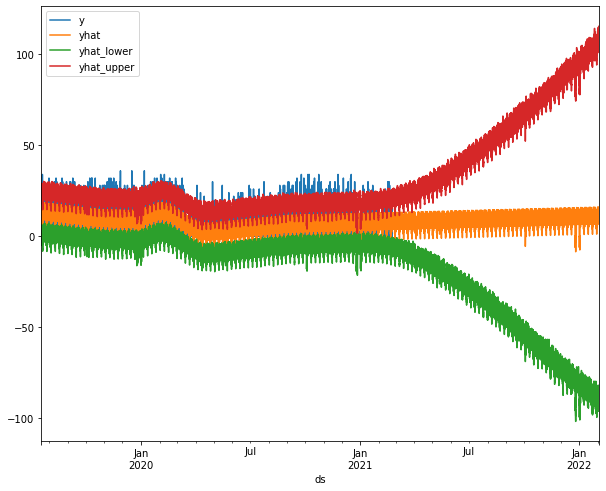

In [81]:
results.plot()

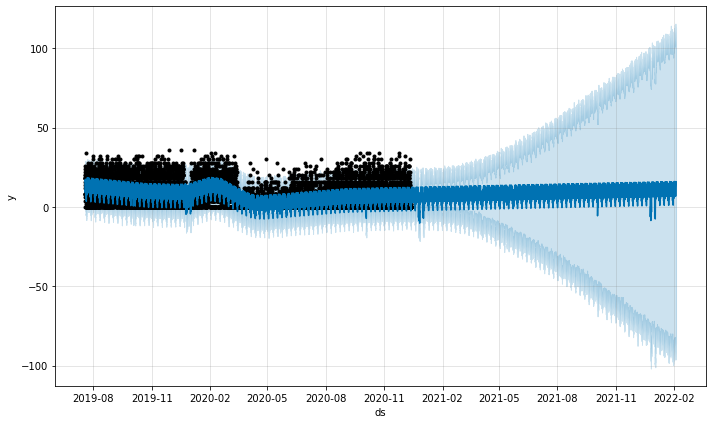

In [82]:

fig1 = m.plot(forecast)

In [ ]:
comp=m.plot_components(forecast)

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:

deltas = m.params['delta'].mean(0)
deltas

In [ ]:

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [ ]:

m.changepoints

In [ ]:
pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [ ]:

from prophet.diagnostics import cross_validation
cv_results = cross_validation( model = m, initial = '100 days', horizon = '50 days')

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

In [ ]:
results

In [ ]:
results['error'] = results['y'] - results['yhat']

In [ ]:
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']

In [ ]:
results

In [ ]:
results[results['error'].abs() >  tolerence_level*results['uncertainty']]

In [ ]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) >  tolerence_level*x['uncertainty']) else 'No', axis=1)

results

In [ ]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly', title='Anomaly Detection')

fig.update_xaxes(
    rangeslider_visible=True
    
)
fig.show()

In [ ]:
comp=m.plot_components(forecast)

In [ ]:
results.query("anomaly == 'Yes'" )

## Saving and Loading Model

In [ ]:



with open("Dataset/source addresses/Saved Model/"+ dataset_name +".json", 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

with open("Dataset/source addresses/Saved Model/"+ dataset_name +".json", 'r') as fin:
    new_m = model_from_json(json.load(fin))  # Load model
    

In [ ]:
## Introducing custom anomaly
df_final.loc[df_final["ds"] == "2021-01-27 00:00:00", "y"] = 30


In [ ]:
future = new_m.make_future_dataframe(periods=2258,freq='H',  include_history = True)
forecast = new_m.predict(future)

# min_value = abs(forecast["yhat_lower"].min())
# for col in ['yhat', 'yhat_lower', 'yhat_upper']:
#     forecast[col] = forecast[col] + min_value

results= pd.concat([df_final.set_index('ds')['y'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)


In [ ]:
results['error'] = results['y'] - results['yhat']
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']
results[results['error'].abs() >  tolerence_level*results['uncertainty']]
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) >  tolerence_level*x['uncertainty']) else 'No', axis=1)



In [ ]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly', title='Anomaly Detection')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()